### ==============================
### 1. Import libraries
### ==============================

In [3]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re

### ==============================
### 2. Load dataset
### ==============================

In [5]:
df= pd.read_excel('data_airline_reviews.xlsx')

In [6]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# drop missing reviews
df=df.dropna(subset=['customer_review'])
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


### ==============================
### 3. Clean text
### ==============================

In [13]:
unwanted_phrases = ["âœ… Trip Verified |", "Trip Verified","|","â€™d"]

removed_phrases = []

def clean_and_collect(text):
    if isinstance(text, str):
        for phrase in unwanted_phrases:
            if phrase in text:
                removed_phrases.append(phrase)   # collect the removed phrase
                text = text.replace(phrase, "")  # remove from review
        return text.strip()
    return ""   # handle NaN or non-strings safely


df["customer_review"] = df["customer_review"].apply(clean_and_collect)

In [14]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,London to Izmir via Istanbul. First time I flo...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,Istanbul to Bucharest. We make our check in in...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,Rome to Prishtina via Istanbul. I flew with th...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,Flew on Turkish Airlines IAD-IST-KHI and retur...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,Mumbai to Dublin via Istanbul. Never book Turk...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
# removing all the stopwords  and punctuation marks for 
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return " ".join(words)

df["clean_review"] = df["customer_review"].apply(preprocess)


### ==============================
### 4. Define the Sentiment Analysis function
### ==============================

In [ ]:
# define the sentiment Analysis Function
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0 :
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment']=df['clean_review'].apply(get_sentiment)



### ==============================
### 5. Extract Negative Feedback
### ==============================

In [24]:
negative_reviews = df[df["sentiment"] == "Negative"]

print("📊 Total reviews:", len(df))
print("❌ Negative reviews:", len(negative_reviews))
print("\nSample Negative Feedback:\n", negative_reviews["customer_review"].head())

📊 Total reviews: 65947
❌ Negative reviews: 21707

Sample Negative Feedback:
 5     Rome to Prishtina via Istanbul. I flew with th...
9     Mumbai to Dublin via Istanbul. Never book Turk...
11    Istanbul to Budapest via Dublin with Turkish A...
13    Istanbul to Algiers, planned to take off at 9:...
15    Basel to Cape Town via Istanbul. When I arrive...
Name: customer_review, dtype: object


In [22]:
# 6. Combine all negative sentences into one string
all_negative_text = ' '.join(negative_reviews['clean_review'])


### ==============================
### 6. Visualization of the Sentiment
### ==============================


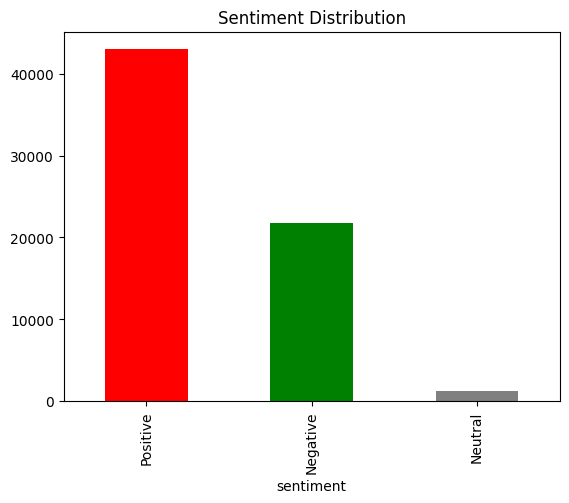

In [30]:
# Bar chart of sentiment distribution
df["sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution", color=["red","green","gray"])
plt.show()

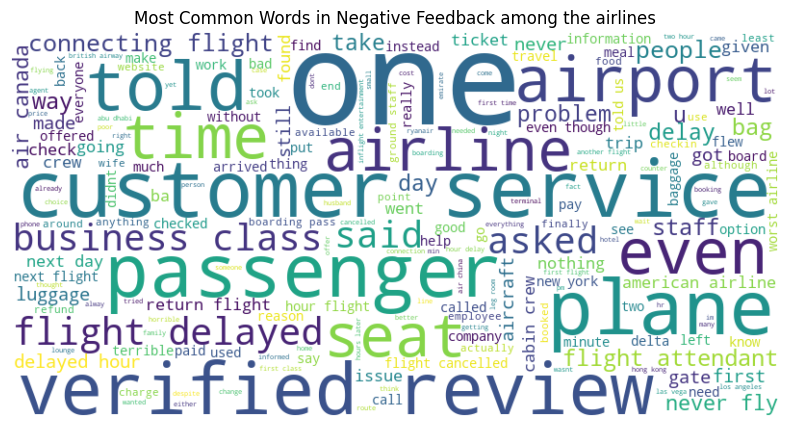

In [33]:
# 7. Create the Word Cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

# 8. Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Negative Feedback among the airlines')
plt.axis('off')
plt.show()

## ==============================
## 7. Airline-wise Negative Feedback
## ==============================

In [ ]:
# Count reviews per airline by sentiment
summary = df.groupby(["airline", "sentiment"]).size().unstack(fill_value=0)

# Add % negative column
summary["total_reviews"] = summary.sum(axis=1)
summary["%_negative"] = (summary["Negative"] / summary["total_reviews"]) * 100

# Sort by highest % negative
summary = summary.sort_values("%_negative", ascending=False)

summary_df= pd.DataFrame(summary)

# Top 10 Airline based on senitments
summary_df.head(10)

sentiment,Negative,Neutral,Positive,total_reviews,%_negative
airline,,,,,
Frontier Airlines,963,43,618,1624,59.298030
Vueling Airlines,556,27,382,965,57.616580
American Airlines,1581,67,1219,2867,55.144751
flydubai,110,5,86,201,54.726368
Spirit Airlines,1536,77,1321,2934,52.351738
Sunwing Airlines,309,16,278,603,51.243781
Eurowings,133,7,124,264,50.378788
Royal Air Maroc,131,6,128,265,49.433962
Pegasus Airlines,144,8,144,296,48.648649


**Insights**

* Frontier Airlines has the highest % of negative reviews (59.3%), showing more than half of passengers are dissatisfied.

* Vueling Airlines (57.6%) and American Airlines (55.1%) also have notably high negative feedback rates.

* Spirit Airlines has the largest review volume (2,934) with over 52% negative sentiment, indicating widespread dissatisfaction.

* On the lower end, Royal Air Maroc (49.4%) and Pegasus Airlines (48.6%) still show nearly half of customers giving negative feedback.

* Across all listed airlines, negative feedback dominates over positive (all above ~48%), suggesting systemic service issues in these carriers.

C:\Users\hardd\AppData\Local\Temp\ipykernel_3656\956890957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


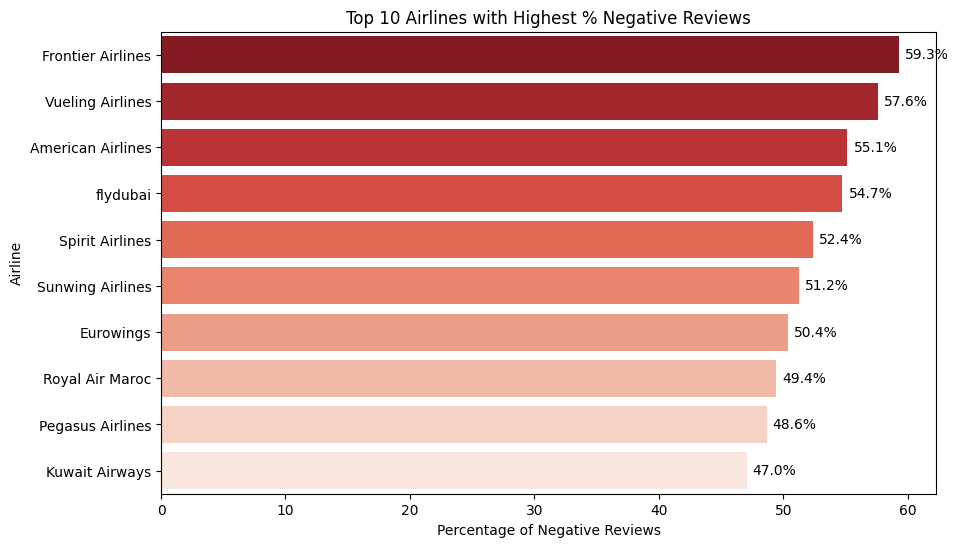

In [84]:

# Sort and get top 10 airlines
top10 = summary.sort_values("%_negative", ascending=False).head(10)

# Plot with seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x="%_negative", 
    y=top10.index, 
    data=top10,
    palette="Reds_r"  
)

plt.xlabel("Percentage of Negative Reviews")
plt.ylabel("Airline")
plt.title("Top 10 Airlines with Highest % Negative Reviews")

# Add labels
for i, v in enumerate(top10["%_negative"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.show()
plt.show()